**Table of contents**<a id='toc0_'></a>    
- [`Note`](#toc1_1_)    
- [Import statements](#toc1_2_)    
- [Anatomy of a Matplotlib figure (Docs)  ](#toc2_)    
  - [Figure](#toc2_1_)    
  - [Axes](#toc2_2_)    
  - [Axis](#toc2_3_)    
  - [Artist](#toc2_4_)    
- [Matplotlib APIs (Docs)  ](#toc3_)    
  - [Third party library interfaces](#toc3_1_)    
- [Basic plotting](#toc4_)    
  - [Creating Figure and Axes to plot](#toc4_1_)    
  - [Types of inputs to the plotting functions](#toc4_2_)    
  - [A basic line plot (Docs)  ](#toc4_3_)    
- [Plot Customization: General Functions](#toc5_)    
  - [*Set multiple properties of an Axes at once with the `ax.set()` method* (Docs)   ](#toc5_1_)    
  - [*Set multiple properties of an Artist at once or list allowed values (to be set) with the `plt.setp(artists, *args, **kwargs)` method* (Docs)   ](#toc5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[`Note`](#toc0_)
We will be using Seaborn to plot different kinds of plots. But it is important to know how to customize those plots using the Matplotlib OO API since Seaborn is based on Matplotlib. Thus we will primarily focus on plot customization and not how to plot different types of plots using matplotlib. 

### <a id='toc1_2_'></a>[Import statements](#toc0_)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## <a id='toc2_'></a>Anatomy of a Matplotlib figure ([Docs](https://matplotlib.org/stable/tutorials/introductory/quick_start.html))   [&#8593;](#toc0_)

<img src="./mpl_fig_axes_axis.png" width=400 height=400> <img src="./anatomy_of_a_matplotlib_figure.webp" width=500 height=400>

### <a id='toc2_1_'></a>[Figure](#toc0_)

Matplotlib graphs your data on Figures (e.g., windows, Jupyter widgets, etc.). The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

### <a id='toc2_2_'></a>[Axes](#toc0_)

A figure can contain multiple Axes. An Axes contains a region for plotting data (an area where points can be specified in terms of x-y coordinates or, theta-r in a polar plot, x-y-z in a 3D plot, etc.), and usually includes two (or three in the case of 3D) Axis objects.

Each Axes also has, 
- **A title:** set via `ax.set_title()`
- **An x-label:** set via `ax.set_xlabel()`
- **A y-label:** set via `ax.set_ylabel()`

### <a id='toc2_3_'></a>[Axis](#toc0_)

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### <a id='toc2_4_'></a>[Artist](#toc0_)

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## <a id='toc3_'></a>Matplotlib APIs ([Docs](https://matplotlib.org/stable/users/explain/api_interfaces.html#why-be-explicit))   [&#8593;](#toc0_)

Matplotlib has two major application interfaces, or styles of using the library:

- An explicit "Axes" interface that uses methods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface. We call this an "explicit" interface because each object is explicitly referenced, and used to make the next object. Keeping references to the objects is very flexible, and allows us to customize the objects after they are created, but before they are displayed.

- An implicit "pyplot" interface that keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants. This can be convenient, particularly when doing interactive work or simple scripts. A reference to the current Figure can be retrieved using `plt.gcf` and to the current Axes by `plt.gca`.

Why be explicit? https://matplotlib.org/stable/users/explain/api_interfaces.html#why-be-explicit

### <a id='toc3_1_'></a>[Third party library interfaces](#toc0_)

Some third party libraries have chosen to implement plotting for their data objects, e.g. data.plot(), is seen in pandas, xarray, and other third-party libraries. This is done so that, the library can hide all the nitty-gritty from the user, and can make a visualization appropriate to the data type, often with good labels, choices of colormaps, and other convenient features.

However, in some cases we may not like the title the library provides. Thankfully, usually they pass us back the Axes from the plot() method, and understanding the explicit Axes interface, we could call: ax.set_title('My preferred title') to customize the title.

Many libraries also allow their plot methods to accept an optional ax argument. This allows us to place the visualization in an Axes that we have placed and perhaps customized.

## <a id='toc4_'></a>[Basic plotting](#toc0_)

### <a id='toc4_1_'></a>[Creating Figure and Axes to plot](#toc0_)

The simplest way of creating a Figure with an Axes is using *pyplot.subplots*. We can then use *Axes.plot* to draw some data on the Axes.

> To create an empty figure (without any axes) we can use `plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, layout {'constrained', 'compressed', 'tight', None}=None)` function

> OR to create a figure with a number of Axes we can use the `plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, width_ratios=None, height_ratios=None, gridspec_kw=None, **fig_kw)` function

<u>Function Parameters</u>
- nrows, ncols: number of rows/columns on the subplot grid
- sharex, sharey: Controls sharing of properties among x (sharex) or y (sharey) axes:
    - True or 'all': x- or y-axis will be shared among all subplots (a good choice for ensuring that the axes scales of all the subplots are similar which is useful for comparing data in two different subplots).
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot in a row will share the y-axis.
    - 'col': each subplot in a column will share the x-axis.
- width_ratios, height_ratios: *Array like of length ncols or nrows*. Defines the relative widths of the columns or heights of the rows. Each column gets a relative width of *width_ratios[i] / sum(width_ratios)* and each row gets a relative height of *height_ratios[i] / sum(height_ratios)*. If not given, all columns/rows will have the same width/height.
- `**fig_kw:` all additional keyword arguments are passed to the *pyplot.figure* call. Some of the important figure keywords are --
    - num: a unique identifier for the figure (int or str)
    - figsize: (width, height) in inches
    - dpi: resolution of the figure in dots-per-inches
    - facecolor: background color
    - edgecolor: border color
    - frameon: whether to draw the figure frame
    - layout: the layout mechanism for positioning of plot elements to avoid overlapping Axes decorations (labels, ticks, etc). Note that layout managers can measurably slow down figure display.

<u>Returns</u> 
(Figure, Axes or an Array of Axes)

**`Note:`** It is also possible to add a single axes one at a time to a figure. To do that we can use the, `plt.subplot()` function or the `plt.subplot2grid()` function. A brief explanation of these functions are given [here](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#adding-single-axes-at-a-time).

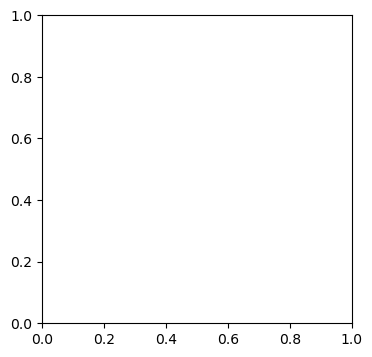

In [2]:
# let's create a figure and an axes on that figure where we will then draw a simple line plot
fig, ax = plt.subplots(figsize=(4, 4), facecolor="w", num="fig_line_plot")

### <a id='toc4_2_'></a>[Types of inputs to the plotting functions](#toc0_)

*Plotting functions expect `numpy.array or numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting.*

### <a id='toc4_3_'></a>A basic line plot ([Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib-axes-axes-plot))   [&#8593;](#toc0_)

In [3]:
x = np.linspace(0, 2, 50)

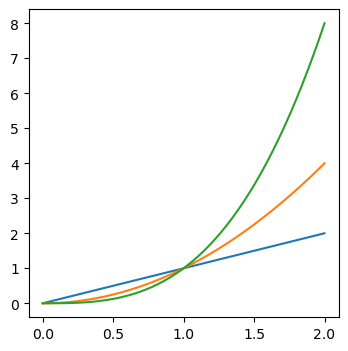

In [4]:
# we draw our plots on the Axes, "ax" defined previousely as a child of figure "fig" labeled as "fig_line_plot"
# to show the figure with the plt.show() we first set the current Axes to "ax" with the plt.sca() method 
# which also sets the current Figure to the parent of "ax" i.e, "fig".

plt.sca(ax)

ax.plot(x, x)
ax.plot(x, x**2)
ax.plot(x, x**3)

plt.show()

## <a id='toc5_'></a>[Plot Customization: General Functions](#toc0_)

### <a id='toc5_1_'></a>*Set multiple properties of an Axes at once with the `ax.set()` method* ([Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html))    [&#8593;](#toc0_)

In [5]:
help(ax.set)

Help on method set in module matplotlib.artist:

set(*, adjustable=<UNSET>, agg_filter=<UNSET>, alpha=<UNSET>, anchor=<UNSET>, animated=<UNSET>, aspect=<UNSET>, autoscale_on=<UNSET>, autoscalex_on=<UNSET>, autoscaley_on=<UNSET>, axes_locator=<UNSET>, axisbelow=<UNSET>, box_aspect=<UNSET>, clip_box=<UNSET>, clip_on=<UNSET>, clip_path=<UNSET>, facecolor=<UNSET>, frame_on=<UNSET>, gid=<UNSET>, in_layout=<UNSET>, label=<UNSET>, mouseover=<UNSET>, navigate=<UNSET>, path_effects=<UNSET>, picker=<UNSET>, position=<UNSET>, prop_cycle=<UNSET>, rasterization_zorder=<UNSET>, rasterized=<UNSET>, sketch_params=<UNSET>, snap=<UNSET>, subplotspec=<UNSET>, title=<UNSET>, transform=<UNSET>, url=<UNSET>, visible=<UNSET>, xbound=<UNSET>, xlabel=<UNSET>, xlim=<UNSET>, xmargin=<UNSET>, xscale=<UNSET>, xticklabels=<UNSET>, xticks=<UNSET>, ybound=<UNSET>, ylabel=<UNSET>, ylim=<UNSET>, ymargin=<UNSET>, yscale=<UNSET>, yticklabels=<UNSET>, yticks=<UNSET>, zorder=<UNSET>) method of matplotlib.axes._axes.Axes in

### <a id='toc5_2_'></a>*Set multiple properties of an Artist at once or list allowed values (to be set) with the `plt.setp(artists, *args, **kwargs)` method* ([Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html))    [&#8593;](#toc0_)

In [6]:
help(plt.setp)

Help on function setp in module matplotlib.pyplot:

setp(obj, *args, **kwargs)
    Set one or more properties on an `.Artist`, or list allowed values.
    
    Parameters
    ----------
    obj : `~matplotlib.artist.Artist` or list of `.Artist`
        The artist(s) whose properties are being set or queried.  When setting
        properties, all artists are affected; when querying the allowed values,
        only the first instance in the sequence is queried.
    
        For example, two lines can be made thicker and red with a single call:
    
        >>> x = arange(0, 1, 0.01)
        >>> lines = plot(x, sin(2*pi*x), x, sin(4*pi*x))
        >>> setp(lines, linewidth=2, color='r')
    
    file : file-like, default: `sys.stdout`
        Where `setp` writes its output when asked to list allowed values.
    
        >>> with open('output.log') as file:
        ...     setp(line, file=file)
    
        The default, ``None``, means `sys.stdout`.
    
    *args, **kwargs
        The pro